# Breast Cancer Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from graphviz import Source
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from tabulate import tabulate

## Modelo de Classificação

### Carregamento do dataset Breast Cancer

In [2]:
# Load dataset
cancer = load_breast_cancer()

# Selecionando duas features para visualização
X_cancer = cancer.data
y_cancer = cancer.target

# Criando DataFrame
df_cancer = pd.DataFrame(X_cancer, columns=cancer.feature_names)
df_cancer["target"] = y_cancer

print("Primeiras linhas do dataset:")
print(tabulate(df_cancer.head(), headers='keys', tablefmt='grid'))
print("\nÚltimas linhas do dataset:")
print(tabulate(df_cancer.tail(), headers='keys', tablefmt='grid'))

print("\nClasses:", cancer.target_names)  # 0 = maligno, 1 = benigno

Primeiras linhas do dataset:
+----+---------------+----------------+------------------+-------------+-------------------+--------------------+------------------+-----------------------+-----------------+--------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+----------+
|    |   mean radius |   mean texture |   mean perimeter |   mean area |   mean smoothness |   mean compactness |   mean concavity |   mean concave points |   mean symmetry |   mean fractal dimension |   radius error |   texture error |   perimeter error |   area error |   smoothness error |   compactness error |   concavity error |   concave poi

### Treinamento de árvore de decisão para classificação

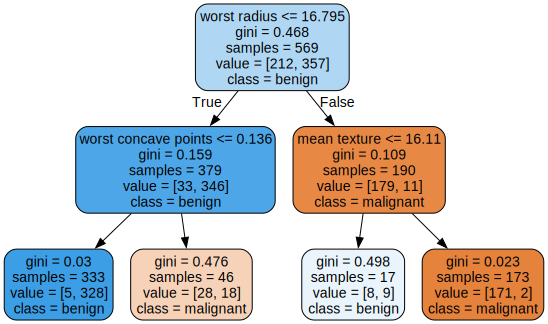

In [5]:
# Criar e treinar o modelo
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_cancer, y_cancer)

# Exportar a árvore para visualização
export_graphviz(
    tree_clf,
    out_file="cancer_tree.dot",
    feature_names=cancer.feature_names,
    class_names=cancer.target_names,
    rounded=True,
    filled=True
)

# Mostrar a árvore
Source.from_file("cancer_tree.dot")

### Predição com novos casos

In [ ]:
# Exemplo 1
print("Exemplo 1 - mean radius=15, mean texture=20:")
print("Probabilidades:", tree_clf.predict_proba([[15, 20]]).round(3))
print("Classe predita:", tree_clf.predict([[15, 20]]))
print("Interpretação:", cancer.target_names[tree_clf.predict([[15, 20]])[0]])

# Exemplo 2
print("\nExemplo 2 - mean radius=10, mean texture=15:")
print("Probabilidades:", tree_clf.predict_proba([[10, 15]]).round(3))
print("Classe predita:", tree_clf.predict([[10, 15]]))
print("Interpretação:", cancer.target_names[tree_clf.predict([[10, 15]])[0]])

## Análise e Avaliação de Métricas

### Divisão em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42)

### Duas árvores com diferentes parâmetros

In [ ]:
# Árvore sem regularização
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf1.fit(X_train, y_train)

# Árvore com regularização
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
tree_clf2.fit(X_train, y_train)

### Visualização das árvores

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plot_tree(tree_clf1, filled=True, rounded=True, class_names=cancer.target_names)
plt.title("Árvore sem regularização")

plt.subplot(1, 2, 2)
plot_tree(tree_clf2, filled=True, rounded=True, class_names=cancer.target_names)
plt.title("Árvore com min_samples_leaf=20")

plt.tight_layout()
plt.show()

### Avaliação nos dados de treino e teste

In [ ]:
print("Acurácia no treino:")
print(f"Árvore 1 (sem regularização): {tree_clf1.score(X_train, y_train):.3f}")
print(f"Árvore 2 (com regularização): {tree_clf2.score(X_train, y_train):.3f}")

print("\nAcurácia no teste:")
print(f"Árvore 1 (sem regularização): {tree_clf1.score(X_test, y_test):.3f}")
print(f"Árvore 2 (com regularização): {tree_clf2.score(X_test, y_test):.3f}")

### Relatório de classificação detalhado

In [ ]:
from sklearn.metrics import classification_report

print("Relatório de Classificação (Árvore regularizada):")
print(classification_report(y_test, 
                          tree_clf2.predict(X_test), 
                          target_names=cancer.target_names))